In [203]:
import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

def parser(x):
    return datetime.strptime(x,'%Y')

df = pd.read_csv('D:\SourceFiles/carrotPop.csv',parse_dates=[0],date_parser=parser)

In [204]:
df.head()

,Year,Imports2
0,1970-01-01,56.2
1,1971-01-01,52.6
2,1972-01-01,51.0
3,1973-01-01,48.0
4,1974-01-01,70.1


In [205]:
df = df.set_index('Year ')

In [206]:
df.head()

,Imports2
Year,
1970-01-01,56.2
1971-01-01,52.6
1972-01-01,51.0
1973-01-01,48.0
1974-01-01,70.1


In [207]:
df.shift(1)

,Imports2
Year,
1970-01-01,NaN
1971-01-01,56.2
1972-01-01,52.6
1973-01-01,51.0
1974-01-01,48.0
1975-01-01,70.1
1976-01-01,60.8
1977-01-01,67.3
1978-01-01,72.6


In [208]:
df_diff =df.diff(periods=1)

In [209]:
df_diff = df_diff[1:]
df_diff.head()

,Imports2
Year,
1971-01-01,-3.6
1972-01-01,-1.6
1973-01-01,-3.0
1974-01-01,22.1
1975-01-01,-9.3


In [210]:
df.size

49

In [211]:
train, test=df[:40], df[40:]

In [212]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [218]:
n_input = 12
n_features = 1

generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit_generator(generator, epochs=180)

Epoch 1/180
5/5 [==============================] - 0s 90ms/step - loss: 0.2529
Epoch 2/180
5/5 [==============================] - 0s 15ms/step - loss: 0.1126
Epoch 3/180
5/5 [==============================] - 0s 17ms/step - loss: 0.0231
Epoch 4/180
5/5 [==============================] - 0s 14ms/step - loss: 0.0376
Epoch 5/180
5/5 [==============================] - 0s 15ms/step - loss: 0.0166
Epoch 6/180
5/5 [==============================] - 0s 13ms/step - loss: 0.0376
Epoch 7/180
5/5 [==============================] - 0s 13ms/step - loss: 0.0303
Epoch 8/180
5/5 [==============================] - 0s 14ms/step - loss: 0.0123
Epoch 9/180
5/5 [==============================] - 0s 16ms/step - loss: 0.0175
Epoch 10/180
5/5 [==============================] - 0s 13ms/step - loss: 0.0182
Epoch 11/180
5/5 [==============================] - 0s 14ms/step - loss: 0.0168
Epoch 12/180
5/5 [==============================] - 0s 15ms/step - loss: 0.0157
Epoch 13/180
5/5 [==============================]

5/5 [==============================] - 0s 13ms/step - loss: 0.0053
Epoch 104/180
5/5 [==============================] - 0s 13ms/step - loss: 0.0129
Epoch 105/180
5/5 [==============================] - 0s 14ms/step - loss: 0.0108
Epoch 106/180
5/5 [==============================] - 0s 13ms/step - loss: 0.0125
Epoch 107/180
5/5 [==============================] - 0s 13ms/step - loss: 0.0100
Epoch 108/180
5/5 [==============================] - 0s 13ms/step - loss: 0.0107
Epoch 109/180
5/5 [==============================] - 0s 13ms/step - loss: 0.0157
Epoch 110/180
5/5 [==============================] - 0s 13ms/step - loss: 0.0212
Epoch 111/180
5/5 [==============================] - 0s 15ms/step - loss: 0.0099
Epoch 112/180
5/5 [==============================] - 0s 13ms/step - loss: 0.0148
Epoch 113/180
5/5 [==============================] - 0s 13ms/step - loss: 0.0090
Epoch 114/180
5/5 [==============================] - 0s 13ms/step - loss: 0.0094
Epoch 115/180
5/5 [=======================

In [219]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:], [[pred_list[i]]], axis=1)

In [220]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=df[-n_input:].index, columns=['Predictions'])

df_test = pd.concat([df, df_predict], axis=1)

In [221]:
df_test.tail()

,Imports2,Predictions
Year,,
2014-01-01,396.5,281.419441
2015-01-01,427.4,293.977590
2016-01-01,474.5,313.546529
2017-01-01,458.7,332.822642
2018-01-01,494.5,339.179141


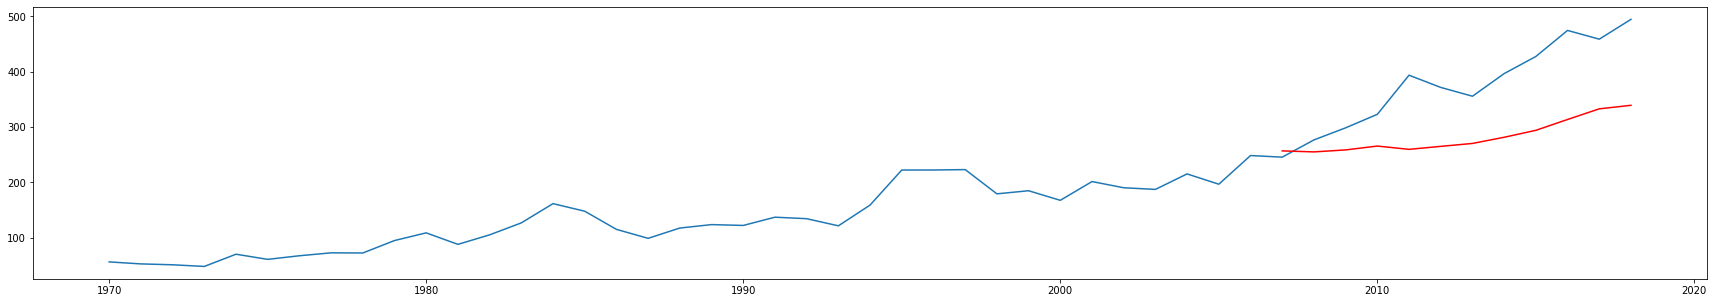

In [222]:
plt.figure(figsize=(30,5))
plt.plot(df_test.index, df_test['Imports2'])
plt.plot(df_test.index, df_test['Predictions'], color='r')
plt.show()